# Notebook Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [3]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load The Data

In [4]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [5]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probability

## The Dot Product

In [6]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [7]:
a.dot(b)

22

In [8]:
c = np.array([[0,6] , [1,3] , [2 , 5]]) 
c

array([[0, 6],
       [1, 3],
       [2, 5]])

In [9]:
a.dot(c)

array([ 8, 27])

In [10]:
X_test.shape

(1724, 2500)

In [11]:
type(prob_token_spam)

numpy.ndarray

In [12]:
prob_token_spam.shape

(2500,)

In [13]:
X_test.dot(prob_token_spam).shape

(1724,)

## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)} $$

In [14]:
PROB_SPAM = 0.3116

In [15]:
np.log(prob_token_spam)

array([ -4.40749688,  -5.25357169,  -4.98997412, ...,  -9.79153312,
       -12.09411822, -10.14820807])

# Joint Probability In Log Format

In [16]:
joint_log_spam = X_test.dot( np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log( PROB_SPAM )

In [17]:
joint_log_spam[:5]

array([24.30575159,  2.1679757 , 20.60107082, 17.78436605, 20.53548931])

In [18]:
prob_token_ham

array([2.14691743e-02, 1.01395261e-02, 8.00591929e-03, ...,
       8.22123741e-05, 1.40935499e-04, 1.01786749e-04])

In [19]:
joint_log_ham = X_test.dot( np.log( prob_token_ham ) - np.log( prob_all_tokens) ) + np.log( 1 - PROB_SPAM )

In [20]:
joint_log_ham[:5]

array([-60.98864634, -11.01485105, -37.97486134, -59.15582654,
       -53.80817824])

In [21]:
joint_log_ham.size

1724

# Making Predictions

### Checking for Higher Joint Probability

In [22]:
prediction = joint_log_spam > joint_log_ham 

In [23]:
prediction[-5:] * 1

array([1, 0, 0, 0, 0])

In [24]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

In [25]:
joint_log_spam = X_test.dot( np.log(prob_token_spam)) + np.log( PROB_SPAM )
joint_log_ham = X_test.dot( np.log( prob_token_ham )) + np.log( 1 - PROB_SPAM )

# Metrics & Evaluation

## Accuracy

In [26]:
correct_doc = ( y_test == prediction ).sum()
print('Docs classified correctly: ', correct_doc)

num_docs_wrong = X_test.shape[0] - correct_doc
num_docs_wrong

Docs classified correctly:  1685


39

In [27]:
# Accuracy
correct_doc/ len(X_test)

0.9773781902552204

## Visualising the Results

In [28]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

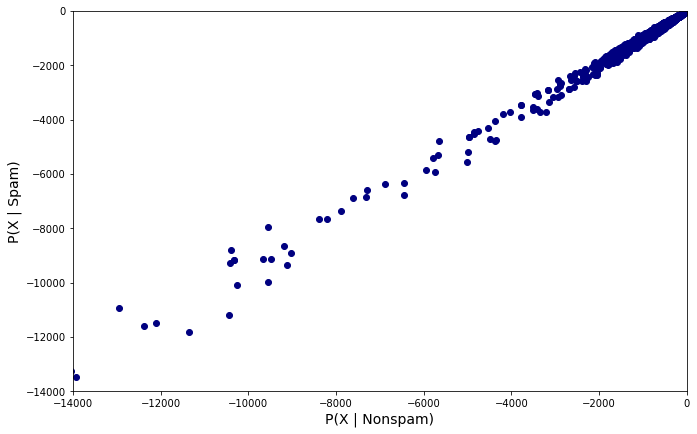

In [29]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

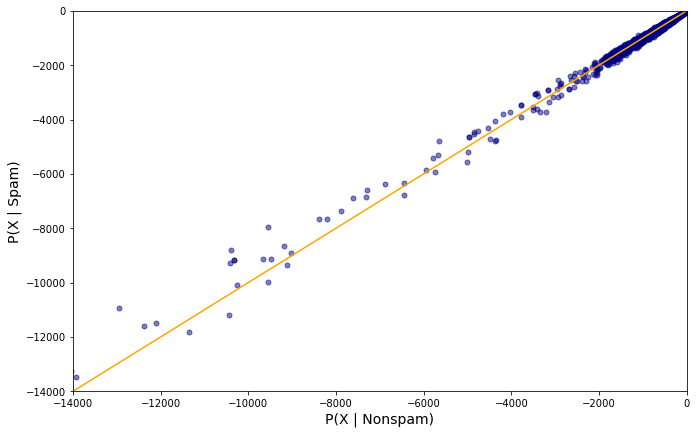

In [30]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

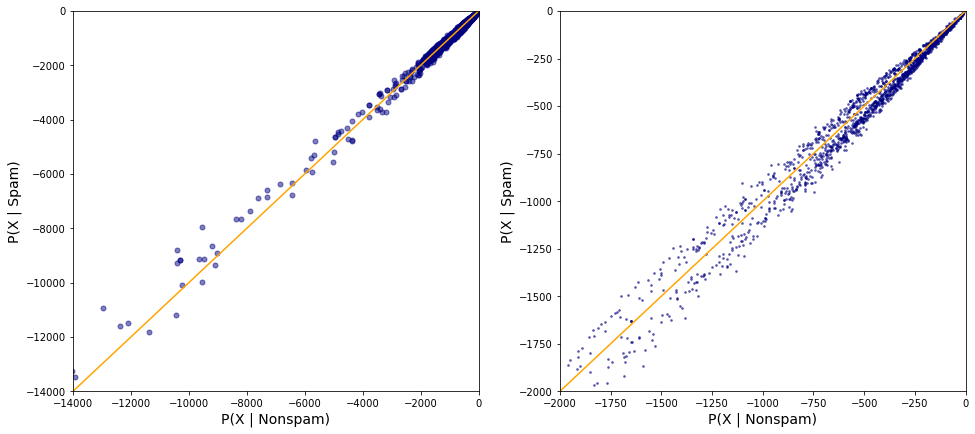

In [31]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [32]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

C:\Users\User\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


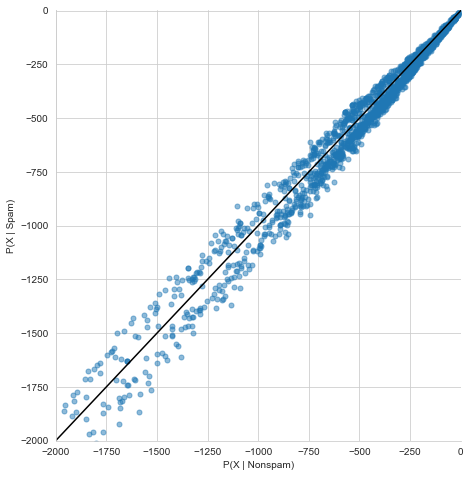

In [43]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False,scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


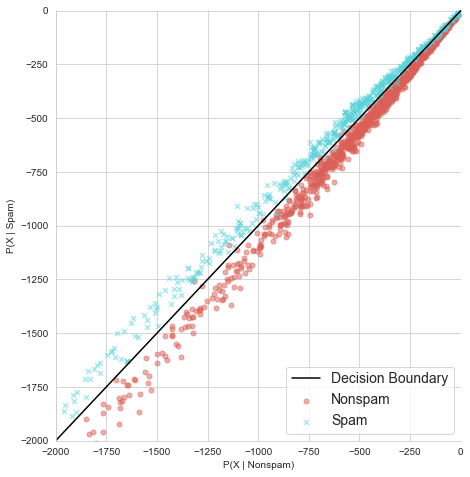

In [45]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


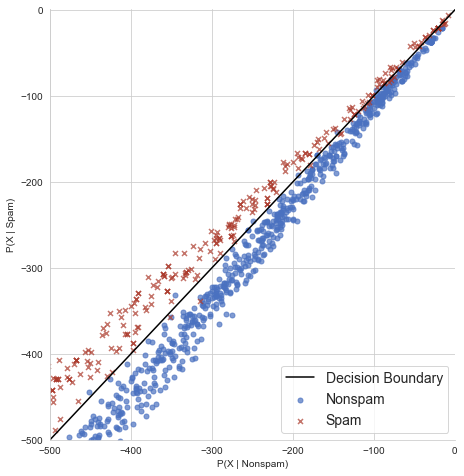

In [47]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

## False Positive & False Negative

In [48]:
np.unique( prediction , return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [49]:
true_pos = ( y_test == 1 ) & ( prediction == 1)

In [53]:
true_pos.sum()

569

In [57]:
false_pos = (y_test==0) & ( prediction == 1)

In [59]:
false_pos.sum()

19

In [60]:
false_neg = ( y_test == 1 ) & ( prediction == 0 )

In [62]:
false_neg.sum()

20

## Recall Score

In [68]:
recall_score = ( true_pos.sum() ) / (true_pos.sum() + false_neg.sum() )

In [70]:
print('Recall Score: {:.2%}'.format(recall_score))

Recall Score: 96.60%


## Precision Score

In [71]:
precision_score = ( true_pos.sum() ) / (true_pos.sum() + false_pos.sum() )

In [73]:
print('Precision Score: {:.3%}'.format(precision_score))

Precision Score: 96.769%


## F-Score or F1- score

In [74]:
f1_score = 2 * ( recall_score * precision_score ) / ( precision_score + recall_score)

In [75]:
f1_score

0.9668649107901445